In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Embedding,LSTM,Conv1D,MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score



***Exporing fake news***

In [ ]:
fake=pd.read_csv('https://raw.githubusercontent.com/Vishal-Aggarwal0305/fake-real-news-dataset/main/data/Fake.csv')
fake.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
  fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

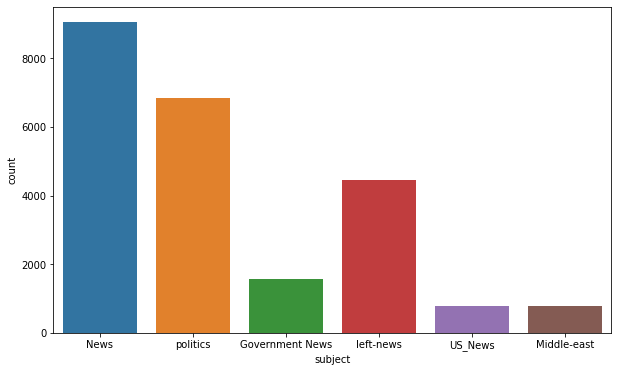

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=fake)

## wordcloud 

In [ ]:
text=' '.join(fake['text'].tolist())

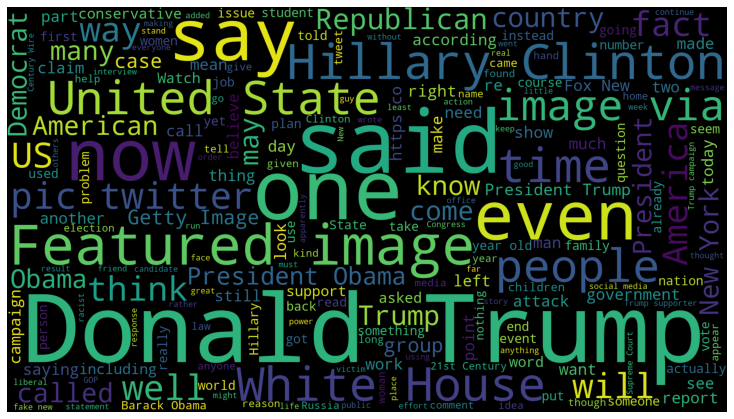

In [ ]:
wordcloud=WordCloud(width=1920,height=1080).generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Explore Real news


In [ ]:
real=pd.read_csv('https://raw.githubusercontent.com/Vishal-Aggarwal0305/fake-real-news-dataset/main/data/True.csv')

In [ ]:
text=' '.join(real['text'].tolist())

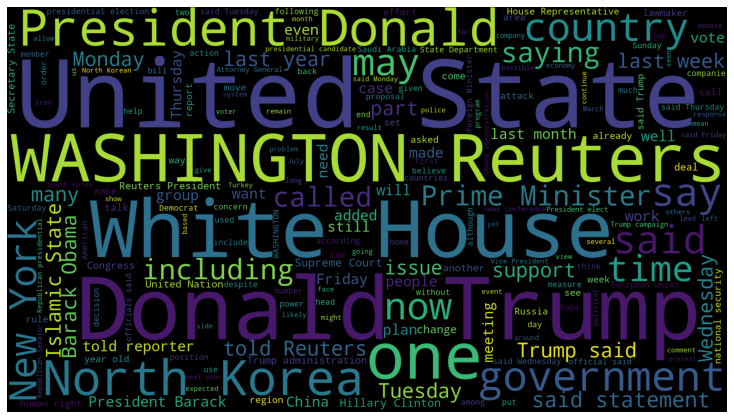

In [ ]:
wordcloud=WordCloud(width=1920,height=1080).generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
real.sample(5)

,title,text,subject,date
20837,Lesotho detains army major over killing of mil...,MASERU (Reuters) - Lesotho has detained a seni...,worldnews,"September 6, 2017"
11681,UK's May to visit China around Jan. 31: Sky News,(Reuters) - British Prime Minister Theresa May...,worldnews,"December 20, 2017"
3306,Trump voter fraud official announces bid for K...,(Reuters) - Kansas Secretary of State Kris Kob...,politicsNews,"June 8, 2017"
19233,"Echoing France, Germany says May offered 'noth...",BERLIN (Reuters) - Germany s foreign minister ...,worldnews,"September 23, 2017"
710,U.S. small business lobby throws support behin...,WASHINGTON (Reuters) - The National Federation...,politicsNews,"November 9, 2017"


In [ ]:
unknown_publishers=[]
for index,row in enumerate(real.text.values):
  try:
    record=row.split('-',maxsplit=1)
    record[1]
    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)

In [ ]:
len(unknown_publishers)

222

In [ ]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [ ]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [ ]:
real=real.drop(8970,axis=0)

In [ ]:
 publisher=[]
 tmp_text=[]
 for index,row in enumerate(real.text.values):
   if index in unknown_publishers:
     tmp_text.append(row)
     publisher.append('Unknown')
   else:
     record=row.split('-',maxsplit=1)
     publisher.append(record[0].strip())
     tmp_text.append(record[1].strip())

In [ ]:
real['publisher']=publisher
real['text']=tmp_text

In [ ]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [ ]:
real.shape

(21416, 5)

In [ ]:
empty_fake_index=[index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [ ]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [ ]:
real['text']=real['title']+ " " + real['text']
fake['text']=fake['title']+ " " + fake['text']

In [ ]:
real['text']=real['text'].apply(lambda x: str(x).lower())
fake['text']=fake['text'].apply(lambda x: str(x).lower())

## Preprocessing Text

In [ ]:
real['class']=1
fake['class']=0

In [ ]:
real=real[['text','class']]

In [ ]:
fake=fake[['text','class']]

In [ ]:
data=real.append(fake,ignore_index=True)

In [ ]:
data.sample(5)

,text,class
19591,turkey threatens sanctions over kurdish indepe...,1
20220,al qaeda warns myanmar of 'punishment' over ro...,1
17130,four britons kidnapped in nigeria's delta stat...,1
38585,while obama vacations and hands out a billion ...,0
26269,"trump fans were scammed for over $1 million, ...",0


######https://github.com/laxmimerit/preprocess_kgptalkie/tree/master/preprocess_kgptalkie

In [ ]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall


     |████████████████████████████████| 12.0 MB 1.5 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-q_lmyoul
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-q_lmyoul
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11754 sha256=6b4ff383059438c67a9a02df6c3e72323ccb40532aa2fe0e65e3efc7e753034d
  Stored in directory: /tmp/pip-ephem-wheel-cache-uqtz8d3_/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


In [ ]:
import preprocess_kgptalkie as ps


In [ ]:
data['text']=data['text'].apply(lambda x: ps.remove_special_chars(x) )

In [ ]:
ps.remove_special_chars('this ,. @## is gre#t')

'this is gret'

## Vectorisation


In [ ]:
import gensim

In [ ]:
y=data['class'].values

In [ ]:
X=[d.split() for d in data['text'].tolist()]

In [ ]:
type(X[0])

list

In [ ]:
print(X[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [ ]:
DIM=100
w2v_model=gensim.models.Word2Vec(sentences=X,size=DIM,window=5,min_count=1)


In [ ]:
len(w2v_model.wv.vocab)

231872

In [ ]:
w2v_model.wv.most_similar('friend')

[('buddy', 0.7535104751586914),
 ('mentor', 0.697547435760498),
 ('brother', 0.6972472071647644),
 ('son', 0.6962795257568359),
 ('nephew', 0.6896631717681885),
 ('grandfather', 0.6777759790420532),
 ('colleague', 0.6761937737464905),
 ('confidant', 0.6653072834014893),
 ('daughter', 0.6636686325073242),
 ('sister', 0.6622776985168457)]

In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X)

In [ ]:
X=tokenizer.texts_to_sequences(X)

In [ ]:
#tokenizer.word_index

In [ ]:
plt.hist([len(x) for x in X],bins=700)
plt.show()

In [ ]:
nos=np.array([len(x) for x in X])
len(nos[nos>1000])

1581

In [ ]:
 maxlen=1000
 X=pad_sequences(X,maxlen=maxlen)

In [ ]:
len(X[101])

In [ ]:
vocab_size=len(tokenizer.word_index)+1
vocab=tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
  weight_matrix=np.zeros((vocab_size,DIM))

  for word,i in vocab.items():
    weight_matrix[i]=model.wv[word]

  return weight_matrix

In [ ]:
embedding_vectors=get_weight_matrix(w2v_model)

In [ ]:
embedding_vectors.shape

(231873, 100)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,output_dim=DIM,weights=[embedding_vectors],input_length=maxlen,trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23187300  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23,304,677
Trainable params: 117,377
Non-trainable params: 23,187,300
_________________________________________________________________


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y)


In [ ]:
model.fit(X_train,y_train,validation_split=0.3,epochs=6)

Epoch 1/6
737/737 [==============================] - 128s 167ms/step - loss: 0.1841 - acc: 0.9286 - val_loss: 0.0875 - val_acc: 0.9703
Epoch 2/6
737/737 [==============================] - 122s 166ms/step - loss: 0.0517 - acc: 0.9827 - val_loss: 0.0484 - val_acc: 0.9842
Epoch 3/6
737/737 [==============================] - 123s 167ms/step - loss: 0.0389 - acc: 0.9871 - val_loss: 0.0332 - val_acc: 0.9893
Epoch 4/6
737/737 [==============================] - 123s 167ms/step - loss: 0.0239 - acc: 0.9918 - val_loss: 0.0258 - val_acc: 0.9912
Epoch 5/6
737/737 [==============================] - 123s 167ms/step - loss: 0.0153 - acc: 0.9950 - val_loss: 0.0225 - val_acc: 0.9925
Epoch 6/6
737/737 [==============================] - 123s 167ms/step - loss: 0.0107 - acc: 0.9966 - val_loss: 0.0218 - val_acc: 0.9940


In [ ]:
y_pred=(model.predict(X_test)>0.5).astype(int)

In [ ]:
accuracy_score(y_test,y_pred)

0.9926057906458797

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5885
           1       1.00      0.99      0.99      5340

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [ ]:
#x=['This is a news']

x=['PM Modi to launch Kashi Vishwanath Corridor at grand Varanasi event']
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x,maxlen=maxlen)
a=(model.predict(x)>=0.5).astype(int)
if(a==0):
  print("News is Fake")
else:
  print("News is genuine")

News is genuine
